In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from iqradre.prod.idcard import IDCardPredictor
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option("max_rows", None)
import imutils

In [45]:
%%time
config = {
    'segmentor': f'../weights/segment/unet_sfeat32.pth',
    'detector': f'../weights/detect/craft_ktp_ohem.pth.tar',
    'recognitor': f'../weights/recog/ocrnet_pretrained_ktp.pth',
    'extractor': f'../weights/extract/layoutlm_v2.pth',
    'tokenizer': "indobenchmark/indobert-base-p2"   
}

idcard = IDCardPredictor(config, device='cpu')

INFO: Load all model, please wait...


Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMForTokenClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LayoutLMForTokenClassification were not initialized from the model checkpoint at microsoft

INFO: All model has been loaded!
CPU times: user 5.95 s, sys: 497 ms, total: 6.44 s
Wall time: 9.91 s


In [38]:
%%time
# impath = 'images/testktp/201809051058-1_4.jpeg'
impath = '/data/idcard/combined/sampled/14907_image.jpg'
pred_data = idcard.predict(impath)

CPU times: user 9.93 s, sys: 255 ms, total: 10.2 s
Wall time: 1.61 s


In [39]:
pred_data.keys()

dict_keys(['prediction', 'dataframe', 'image', 'images_patch', 'boxes', 'texts', 'score_text', 'score_list', 'score'])

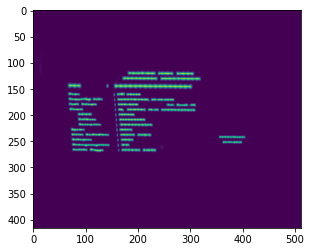

In [40]:
plt.imshow(pred_data['score']);plt.show()

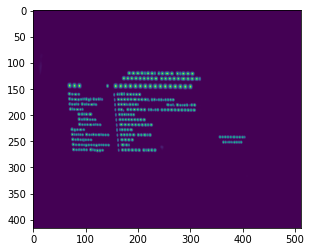

In [41]:
plt.imshow(pred_data['score_text']);plt.show()

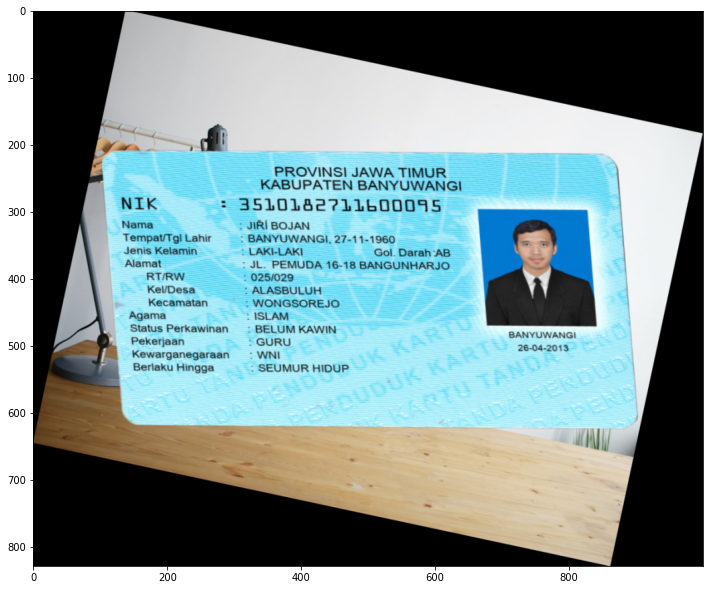

In [42]:
plt.figure(figsize=(12,12))
plt.imshow(pred_data['image']);plt.show()

In [44]:
pred_data['prediction']

{'provinsi': 'PROVINSI JAWA TIMUR',
 'kabupaten': 'KABUPATEN BANYUWANGI',
 'nik': '3510182711600095',
 'nama': 'LBBJAN',
 'ttl': 'BANYUWANGI, 27-11-1960',
 'gender': 'LAKI-LAKI',
 'goldar': 'LABA',
 'alamat': 'JL.T PEMUDA 16-18 BBANGUNHARJO',
 'rtrw': '025/029',
 'kelurahan': 'ALASBULUH',
 'kecamatan': 'WONGSOREJO',
 'agama': 'ISLAM',
 'perkawinan': 'BELUM KAWIN',
 'pekerjaan': 'GURU',
 'kewarganegaraan': 'WNI',
 'berlaku': 'SEUMUR HIDUP',
 'sign_place': 'BANYUWANGI',
 'sign_date': '26-04-2013'}

In [21]:
pred_data['dataframe']

,words,bboxes,tokens,labels,gseq,wseq
0,PROVINSII,"[430.0, 102.0, 562.0, 130.0]",provinsi,U-FLD_PROV,0,0
1,PROVINSII,"[430.0, 102.0, 562.0, 130.0]",##i,I-VAL_NAMA,0,1
2,BBANTAN,"[561.0, 102.0, 671.0, 130.0]",bb,I-VAL_NAMA,1,0
3,BBANTAN,"[561.0, 102.0, 671.0, 130.0]",##antan,I-VAL_NAMA,1,1
4,KOTA,"[426.0, 130.0, 502.0, 156.0]",kota,U-FLD_KAB,2,0
5,TANGERAAR,"[504.0, 130.0, 672.0, 158.0]",tang,U-VAL_KAB,3,0
6,TANGERAAR,"[504.0, 130.0, 672.0, 158.0]",##era,I-VAL_NAMA,3,1
7,TANGERAAR,"[504.0, 130.0, 672.0, 158.0]",##ar,I-VAL_NAMA,3,2
8,367107290500061,"[336.0, 165.0, 655.0, 202.0]",36,B-VAL_NIK,4,0
9,367107290500061,"[336.0, 165.0, 655.0, 202.0]",##71,I-VAL_NIK,4,1


In [22]:
pred_data['texts']

['PROVINSII',
 'BBANTAN',
 'KOTA',
 'TANGERAAR',
 'NIK',
 '367107290500061',
 'L.',
 'Nama',
 'MUHAMAD',
 'LHANDI',
 'ERIZALDI',
 'Tempat/Tgl',
 'Lahir',
 'TANGERANG,',
 '29-05-2000',
 'I-',
 'Jenis',
 'kelamin',
 'LAKI-LAKI',
 'LAK',
 'Gol.',
 'Darah',
 'Alamat',
 'PABUARAN',
 'Le',
 'RT/RW',
 '002/002',
 'LE',
 'Kel/Desa',
 'CIMONE',
 'JAYA',
 'S-I',
 'Kecamatan',
 'KARAWACI',
 'Agama',
 'ISLAM',
 'L-',
 'Status',
 'Perkawinan',
 'BELUM',
 'IKAWIN',
 'HE',
 'Pekerjaan',
 'PELAJAR/MAHASISWA',
 'L.',
 'KOTA',
 'TTANGERANG',
 'Kewarganegaraan',
 'WNI',
 'A-',
 '02-12-2017',
 'Berlaku',
 'Hingga',
 'SEUMUR',
 'THIDUP']

In [23]:
impatch = pred_data['images_patch']
texts = pred_data['texts']

PROVINSII


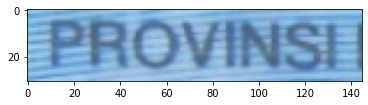

BBANTAN


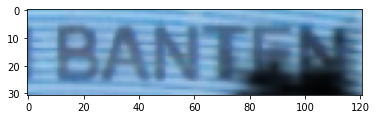

KOTA


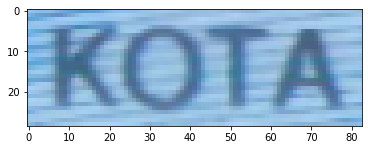

TANGERAAR


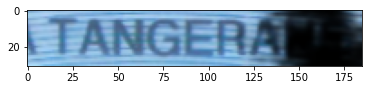

NIK


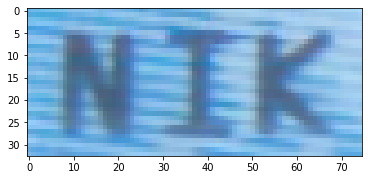

367107290500061


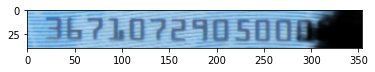

L.


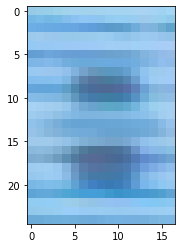

Nama


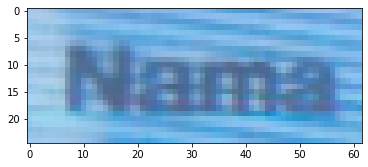

MUHAMAD


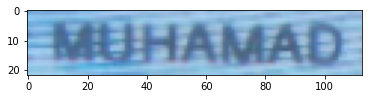

LHANDI


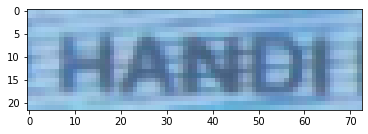

ERIZALDI


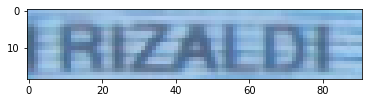

Tempat/Tgl


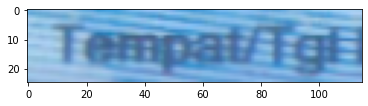

Lahir


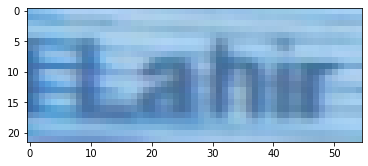

TANGERANG,


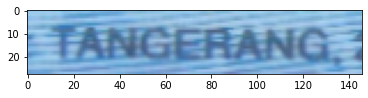

29-05-2000


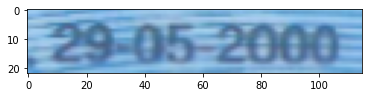

I-


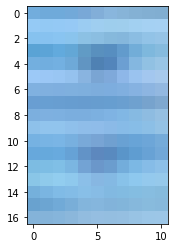

Jenis


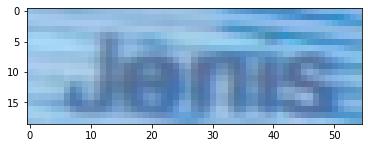

kelamin


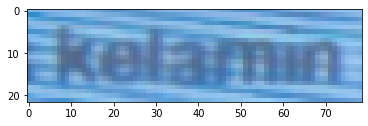

LAKI-LAKI


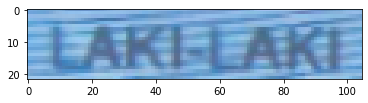

LAK


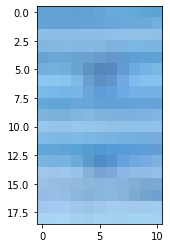

Gol.


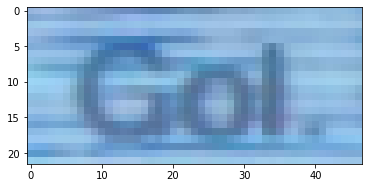

Darah


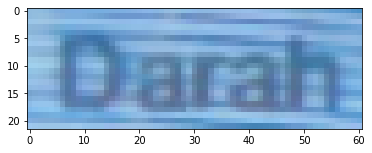

Alamat


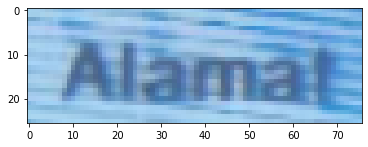

PABUARAN


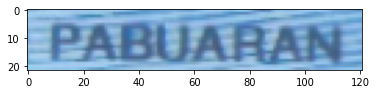

Le


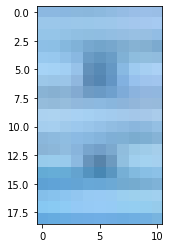

RT/RW


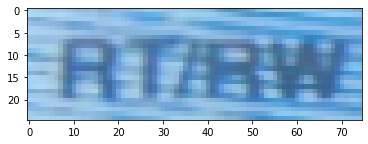

002/002


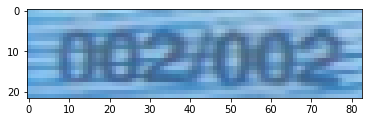

LE


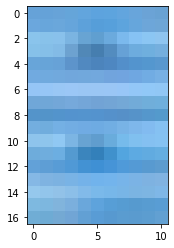

Kel/Desa


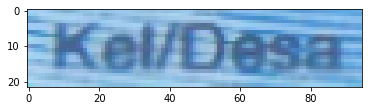

CIMONE


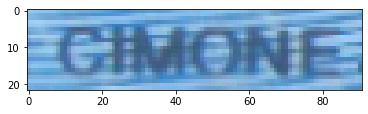

JAYA


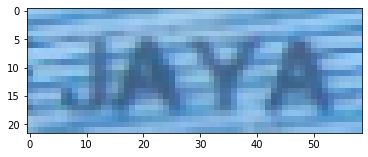

S-I


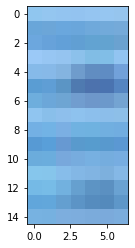

Kecamatan


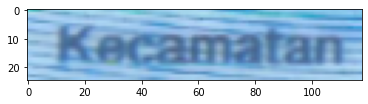

KARAWACI


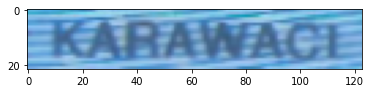

Agama


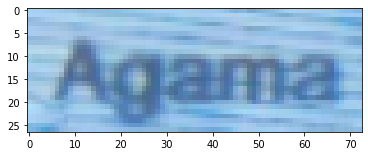

ISLAM


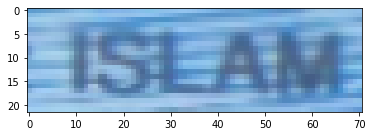

L-


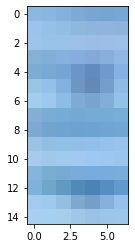

Status


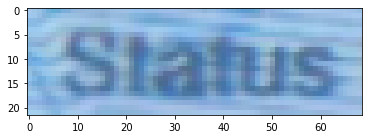

Perkawinan


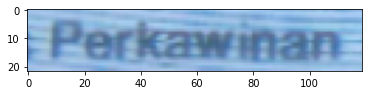

BELUM


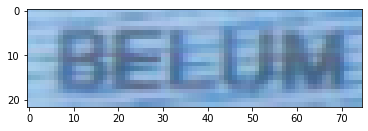

IKAWIN


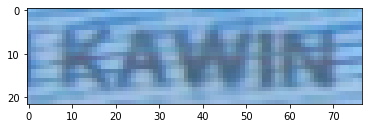

HE


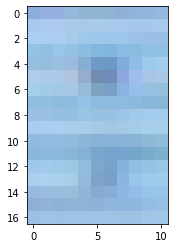

Pekerjaan


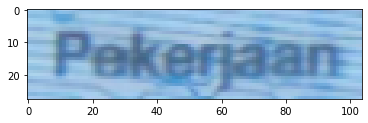

PELAJAR/MAHASISWA


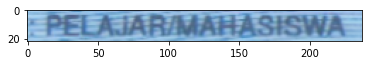

L.


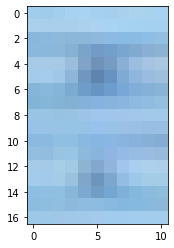

KOTA


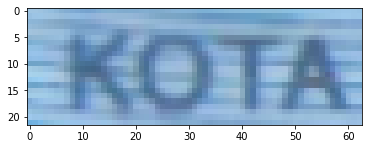

TTANGERANG


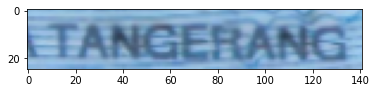

Kewarganegaraan


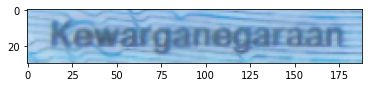

WNI


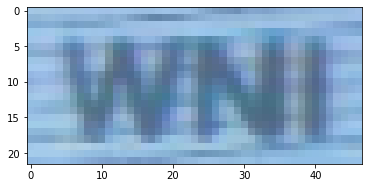

A-


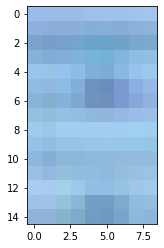

02-12-2017


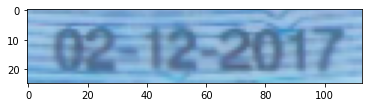

Berlaku


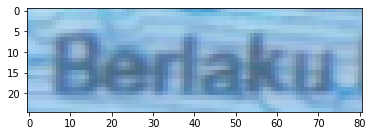

Hingga


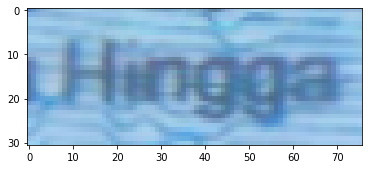

SEUMUR


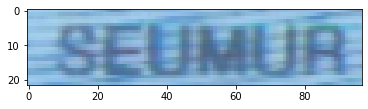

THIDUP


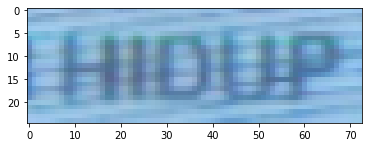

In [24]:
for idx, (patch, txt) in enumerate(zip(impatch, texts)):
    print(txt)    
    plt.imshow(patch);plt.show()
